In [32]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
sns.set()
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px
from functools import reduce

In [33]:
# Load all the data files
df1 = pd.read_csv('../Datasets/Raw/GlobalLandTemperaturesByCountry.csv')
df2 = pd.read_csv('../Datasets/Raw/CH4_Emissions.csv')
df3 = pd.read_csv('../Datasets/Raw/CO2_Emissions.csv')
df4 = pd.read_csv('../Datasets/Raw/HFCs_Emissions.csv')
df5 = pd.read_csv('../Datasets/Raw/MixofHFCsandPFC_Emissions.csv')
df6 = pd.read_csv('../Datasets/Raw/N20_Emissions.csv')
df7 = pd.read_csv('../Datasets/Raw/NF3_Emissions.csv')
df8 = pd.read_csv('../Datasets/Raw/PFC_Emissions.csv')
df9 = pd.read_csv('../Datasets/Raw/SF6_Emissions.csv')

In [34]:
# rename columns in dataframes 
df1.rename(columns = {'dt': 'Date', 'AverageTemperature': 'AvgTemp', \
                      'AverageTemperatureUncertainty': 'AvgTempUncertainty'}, inplace = True)
df2.rename(columns = {'Country or Area': 'Country', 'Value': 'CH4_Emissions'}, inplace = True)
df3.rename(columns = {'Country or Area': 'Country', 'Value': 'C02_Emissions'}, inplace = True)
df4.rename(columns = {'Country or Area': 'Country', 'Value': 'HFCs_Emissions'}, inplace = True)
df5.rename(columns = {'Country or Area': 'Country', 'Value': 'MixofHFCsandPFC'}, inplace = True)
df6.rename(columns = {'Country or Area': 'Country', 'Value': 'N20_Emissions'}, inplace = True)
df7.rename(columns = {'Country or Area': 'Country', 'Value': 'NF3_Emissions'}, inplace = True)
df8.rename(columns = {'Country or Area': 'Country', 'Value': 'PFC_Emissions'}, inplace = True)
df9.rename(columns = {'Country or Area': 'Country', 'Value': 'SF6_Emissions'}, inplace = True)

In [35]:
df1.head()

Date  AvgTemp  AvgTempUncertainty Country
0  1743-11-01    4.384               2.294   Åland
1  1743-12-01      NaN                 NaN   Åland
2  1744-01-01      NaN                 NaN   Åland
3  1744-02-01      NaN                 NaN   Åland
4  1744-03-01      NaN                 NaN   Åland

In [36]:
# set date as the index
df1.Date = pd.to_datetime(df1.Date)
df1.set_index('Date', inplace=True)

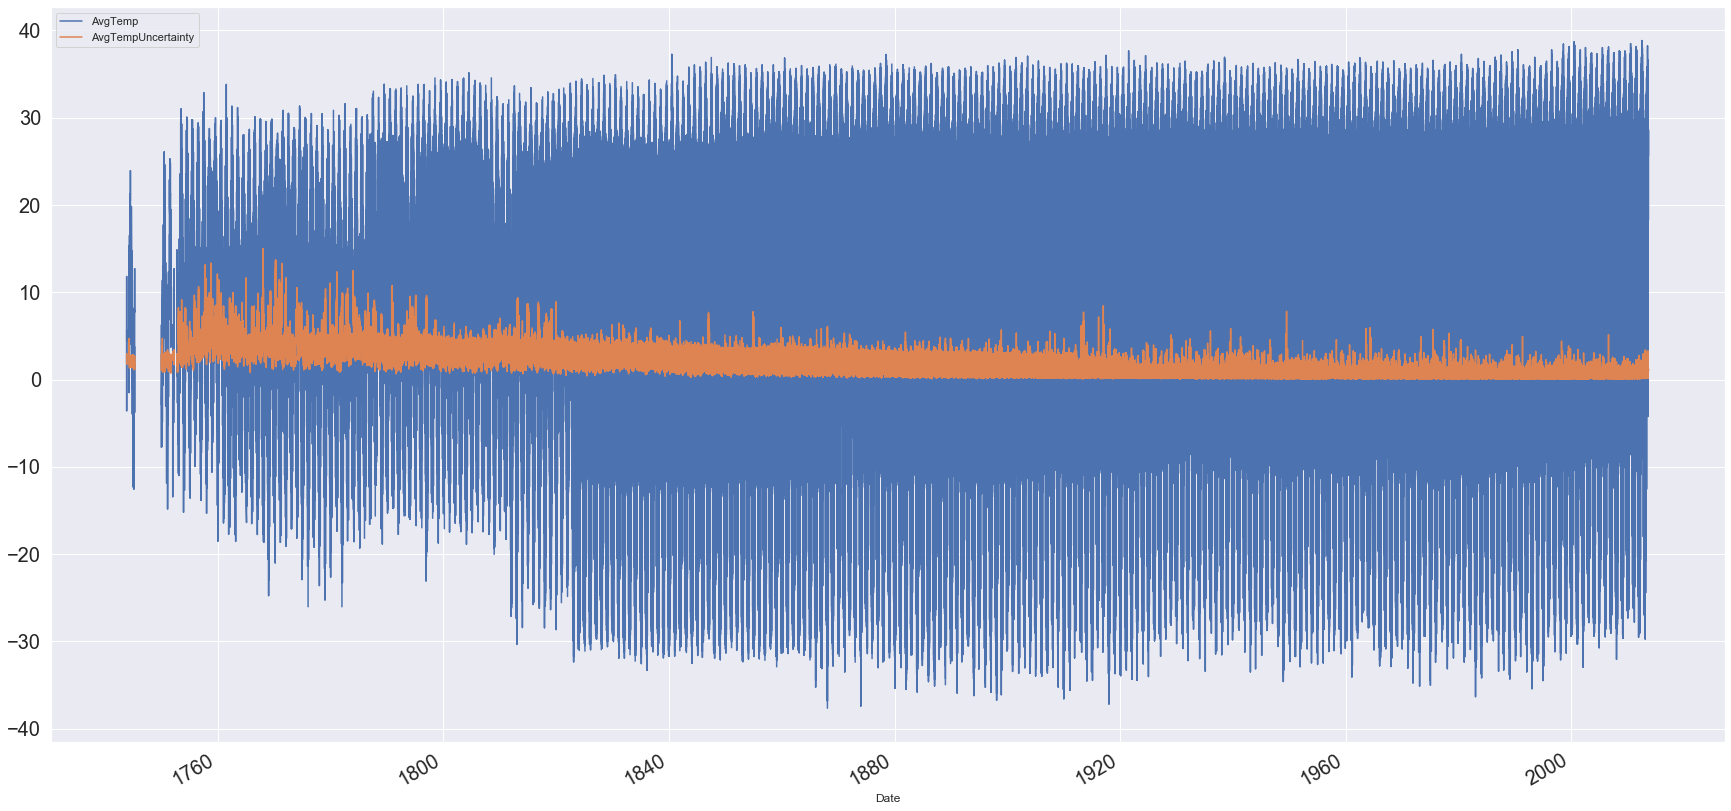

In [37]:
# intiial plot to visualize temperature
df1.plot(figsize = (30,15), fontsize=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3448ff50>,
      dtype=object)

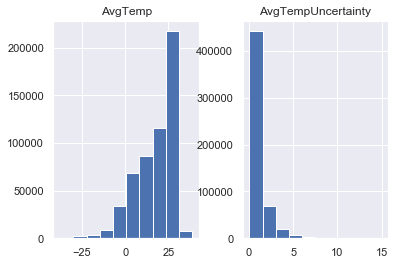

In [38]:
df1.hist()

In [39]:
# extract year, month and weekday from the date column
df1['Year'] = df1.index.year
#df1['Month'] = df1.index.month
#df1['WeekdayName'] = df1.index.day

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AvgTemp             544811 non-null  float64
 1   AvgTempUncertainty  545550 non-null  float64
 2   Country             577462 non-null  object 
 3   Year                577462 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 22.0+ MB


In [41]:
# drop null data
df1.dropna(inplace = True)

In [42]:
# Get yearly average temperature by country
df_AnnualAvg = df1.groupby(['Year','Country']).mean().rename(columns={'AvgTemp':'AnnualAvgTemp'}).reset_index()

In [43]:
df_AnnualAvg.head()

Year  Country  AnnualAvgTemp  AvgTempUncertainty
0  1743  Albania          8.620               2.268
1  1743  Andorra          7.556               2.188
2  1743  Austria          2.482               2.116
3  1743  Belarus          0.767               2.465
4  1743  Belgium          7.106               1.855

In [44]:
df_AnnualAvg.shape

(45915, 4)

In [45]:
# Resample to get yearly average
# df1 = df1.resample('A').mean()
# df1.rename(columns = {'AvgTemp': 'AnnualAvgTemp'}, inplace = True)
# df1.index.rename('Year', inplace = True)
# df1.index = df1.index.year

In [46]:
# data subset - one country for example Canada or top ten countries based on location?
# relationship between temperature and emissions for this subset of data. 
# seasonality trend in summer and winter months over the years

In [47]:
# Join data from multiple dataframes by Year and Country

data_frames = [df_AnnualAvg, df2, df3, df4, df5, df6, df7, df8, df9]

df_Global = reduce(lambda  left,right: pd.merge(left,right,on=['Country','Year'],
                                            how='outer'), data_frames)

In [48]:
df_Global.head()

Year  Country  AnnualAvgTemp  AvgTempUncertainty  CH4_Emissions  \
0  1743  Albania          8.620               2.268            NaN   
1  1743  Andorra          7.556               2.188            NaN   
2  1743  Austria          2.482               2.116            NaN   
3  1743  Belarus          0.767               2.465            NaN   
4  1743  Belgium          7.106               1.855            NaN   

   C02_Emissions  HFCs_Emissions  MixofHFCsandPFC  N20_Emissions  \
0            NaN             NaN              NaN            NaN   
1            NaN             NaN              NaN            NaN   
2            NaN             NaN              NaN            NaN   
3            NaN             NaN              NaN            NaN   
4            NaN             NaN              NaN            NaN   

   NF3_Emissions  PFC_Emissions  SF6_Emissions  
0            NaN            NaN            NaN  
1            NaN            NaN            NaN  
2            NaN            NaN            NaN  
3            NaN            NaN            NaN  
4            NaN            NaN            NaN

In [49]:
df_Global.shape

(46183, 12)

In [50]:
# Remove null values
#df_Global.dropna(inplace = True)

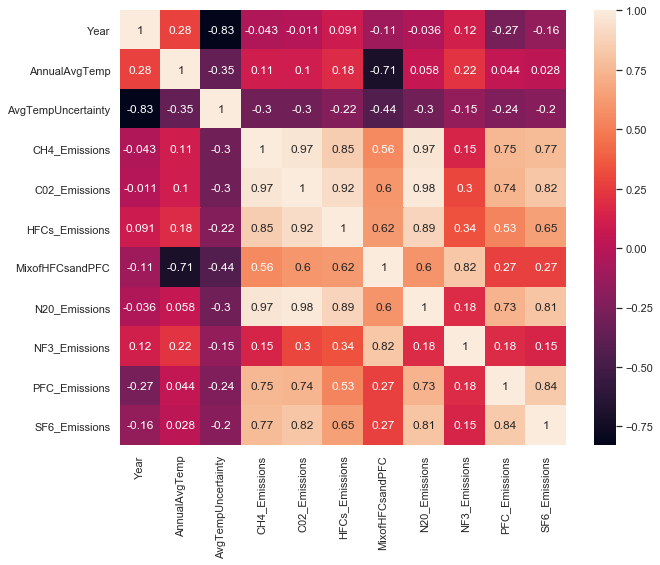

In [51]:
# correlation for global data
plt.figure(figsize = (10,8))
corr_mat = df_Global.corr()
sns.heatmap(corr_mat, annot = True)

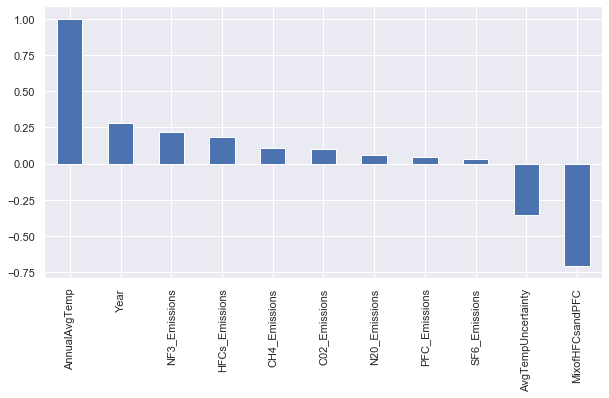

In [52]:
# correlation for global data - bar plot
plt.figure(figsize = (10,5))
corr_mat['AnnualAvgTemp'].sort_values(ascending = False).plot(kind = 'bar');

### Global Temperature trend over the years

In [53]:
# Plot the average temperatures across the globe
fig=px.choropleth(df_Global, locations= "Country", locationmode= "country names",animation_frame= "Year",
animation_group= "Country",color= "AnnualAvgTemp",
color_continuous_scale= 'reds' , hover_name= "Country", 
title = "Global Temperature")
fig.show()

### Analysis for Canada

In [54]:
df_Global.shape

(46183, 12)

In [55]:
# Just for Canada
df_Canada = df_Global[df_Global.Country == "Canada"]

In [56]:
df_Canada.head()

Year Country  AnnualAvgTemp  AvgTempUncertainty  CH4_Emissions  \
1113  1768  Canada      -7.886750            3.669250            NaN   
1171  1769  Canada      -3.427875            3.505500            NaN   
1447  1774  Canada     -13.089333            3.670000            NaN   
1505  1775  Canada      -4.210833            3.049583            NaN   
1563  1776  Canada      -5.411750            3.272667            NaN   

      C02_Emissions  HFCs_Emissions  MixofHFCsandPFC  N20_Emissions  \
1113            NaN             NaN              NaN            NaN   
1171            NaN             NaN              NaN            NaN   
1447            NaN             NaN              NaN            NaN   
1505            NaN             NaN              NaN            NaN   
1563            NaN             NaN              NaN            NaN   

      NF3_Emissions  PFC_Emissions  SF6_Emissions  
1113            NaN            NaN            NaN  
1171            NaN            NaN            NaN  
1447            NaN            NaN            NaN  
1505            NaN            NaN            NaN  
1563            NaN            NaN            NaN

In [57]:
df_Canada.describe()

Year  AnnualAvgTemp  AvgTempUncertainty  CH4_Emissions  \
count   220.000000     216.000000          216.000000      28.000000   
mean   1906.045455      -5.334680            1.317576  101481.300779   
std      66.266569       1.788080            1.058287    7666.805773   
min    1768.000000     -22.616000            0.205083   89031.987452   
25%    1852.750000      -5.802188            0.270583   94707.939973   
50%    1907.500000      -5.279500            0.948792  101418.498145   
75%    1962.250000      -4.645750            2.272229  108050.418754   
max    2017.000000       0.792714            3.670000  112545.819332   

       C02_Emissions  HFCs_Emissions  MixofHFCsandPFC  N20_Emissions  \
count      28.000000       26.000000              0.0      28.000000   
mean   544338.376275     5274.072844              NaN   37176.194692   
std     43783.168742     3811.875405              NaN    2533.452905   
min    452534.619111      460.505097              NaN   33367.762116   
25%    520748.455162     1755.174761              NaN   35507.355082   
50%    565452.702378     4841.427357              NaN   37060.648675   
75%    575779.707029     8392.911495              NaN   38110.361075   
max    594732.073569    12573.458045              NaN   43553.241938   

       NF3_Emissions  PFC_Emissions  SF6_Emissions  
count      28.000000      28.000000      28.000000  
mean        0.211651    4039.158270    1663.823420  
std         0.065757    2401.665202    1074.134182  
min         0.120085     743.976299     373.869839  
25%         0.151045    1844.133256     460.530934  
50%         0.207403    3506.237936    1798.138382  
75%         0.265929    6399.221730    2470.580391  
max         0.324454    8033.115859    3685.239335

In [58]:
df_Canada.drop(['MixofHFCsandPFC'], axis=1)

Year Country  AnnualAvgTemp  AvgTempUncertainty  CH4_Emissions  \
1113   1768  Canada      -7.886750            3.669250            NaN   
1171   1769  Canada      -3.427875            3.505500            NaN   
1447   1774  Canada     -13.089333            3.670000            NaN   
1505   1775  Canada      -4.210833            3.049583            NaN   
1563   1776  Canada      -5.411750            3.272667            NaN   
...     ...     ...            ...                 ...            ...   
45711  2013  Canada      -1.640667            0.533667   96294.671675   
45935  2017  Canada            NaN                 NaN   92847.909026   
45936  2016  Canada            NaN                 NaN   93165.287471   
45937  2015  Canada            NaN                 NaN   96240.700436   
45938  2014  Canada            NaN                 NaN   98396.790205   

       C02_Emissions  HFCs_Emissions  N20_Emissions  NF3_Emissions  \
1113             NaN             NaN            NaN            NaN   
1171             NaN             NaN            NaN            NaN   
1447             NaN             NaN            NaN            NaN   
1505             NaN             NaN            NaN            NaN   
1563             NaN             NaN            NaN            NaN   
...              ...             ...            ...            ...   
45711  577346.377837     9440.556869   36930.971165       0.151045   
45935  571138.877402    12573.458045   38037.397191       0.120085   
45936  564068.415552    12023.408677   37233.058201       0.120085   
45937  576756.850039    11047.124665   36516.973431       0.120085   
45938  577359.551831    10084.976848   35741.470874       0.120085   

       PFC_Emissions  SF6_Emissions  
1113             NaN            NaN  
1171             NaN            NaN  
1447             NaN            NaN  
1505             NaN            NaN  
1563             NaN            NaN  
...              ...            ...  
45711    1617.200078     432.879395  
45935     743.976299     407.494364  
45936     764.613228     472.262402  
45937     968.011796     462.303107  
45938    1088.134894     419.941594  

[220 rows x 11 columns]

In [59]:
df_Canada.head()

Year Country  AnnualAvgTemp  AvgTempUncertainty  CH4_Emissions  \
1113  1768  Canada      -7.886750            3.669250            NaN   
1171  1769  Canada      -3.427875            3.505500            NaN   
1447  1774  Canada     -13.089333            3.670000            NaN   
1505  1775  Canada      -4.210833            3.049583            NaN   
1563  1776  Canada      -5.411750            3.272667            NaN   

      C02_Emissions  HFCs_Emissions  MixofHFCsandPFC  N20_Emissions  \
1113            NaN             NaN              NaN            NaN   
1171            NaN             NaN              NaN            NaN   
1447            NaN             NaN              NaN            NaN   
1505            NaN             NaN              NaN            NaN   
1563            NaN             NaN              NaN            NaN   

      NF3_Emissions  PFC_Emissions  SF6_Emissions  
1113            NaN            NaN            NaN  
1171            NaN            NaN            NaN  
1447            NaN            NaN            NaN  
1505            NaN            NaN            NaN  
1563            NaN            NaN            NaN

/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning:

geom_point : Removed 4 rows containing missing values.



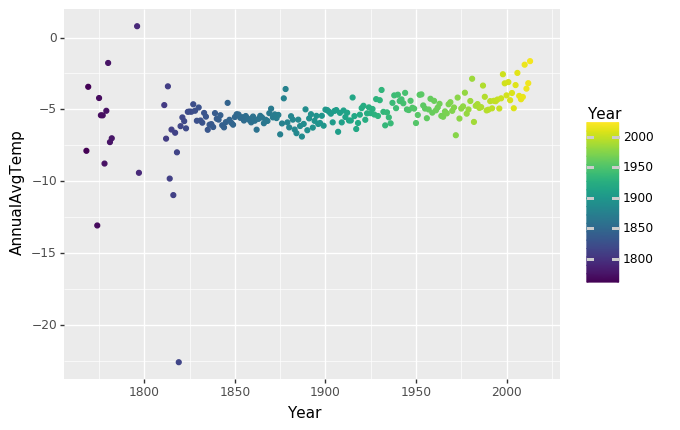

<ggplot: (7034030197)>


In [60]:
# verify trend in temperature in Canada over the years
plt_temp_Canada = ggplot(df_Canada, aes(x= 'Year', y = 'AnnualAvgTemp', color = 'Year')) + geom_point()
print(plt_temp_Canada)

/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:448: PlotnineWarning:

position_stack : Removed 4 rows containing missing values.



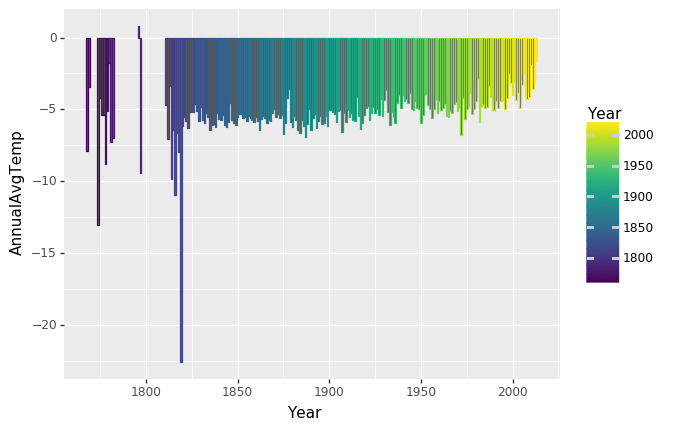

<ggplot: (7026063429)>


In [61]:
# verify trend in temperature in Canada over the years
plt2_temp_Canada = ggplot(df_Canada, aes(x= 'Year', y = 'AnnualAvgTemp', color = 'Year')) + \
geom_bar(stat = "identity")
print(plt2_temp_Canada)

/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning:

geom_point : Removed 192 rows containing missing values.



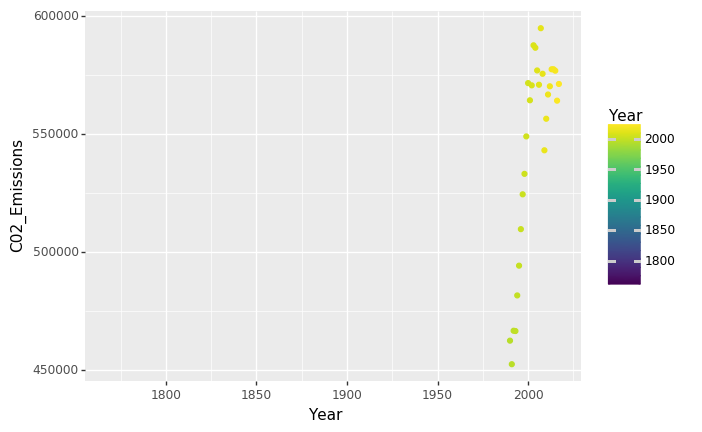

<ggplot: (7034342061)>


In [63]:
# verify trend in emissions in Canada over the years
plt_CO2_Canada = ggplot(df_Canada, aes(x= 'Year', y = 'C02_Emissions', color = 'Year')) + geom_point()
print(plt_CO2_Canada)

/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:448: PlotnineWarning:

position_stack : Removed 192 rows containing missing values.



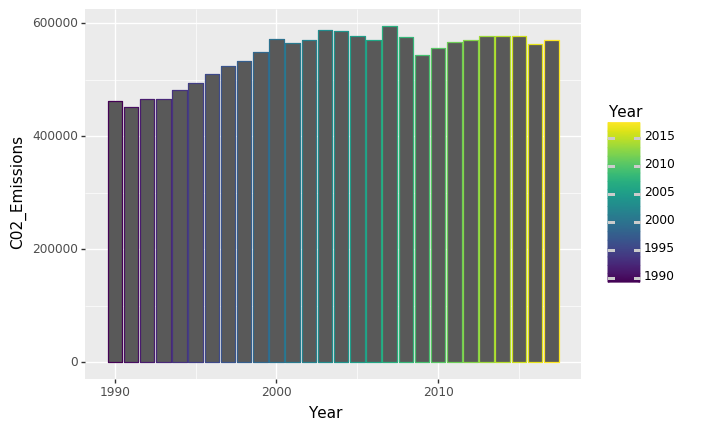

<ggplot: (7028200393)>


In [65]:
plt2_CO2_Canada = ggplot(df_Canada, aes(x= 'Year', y = 'C02_Emissions', color = 'Year')) + geom_bar(stat = "identity")
print(plt2_CO2_Canada)

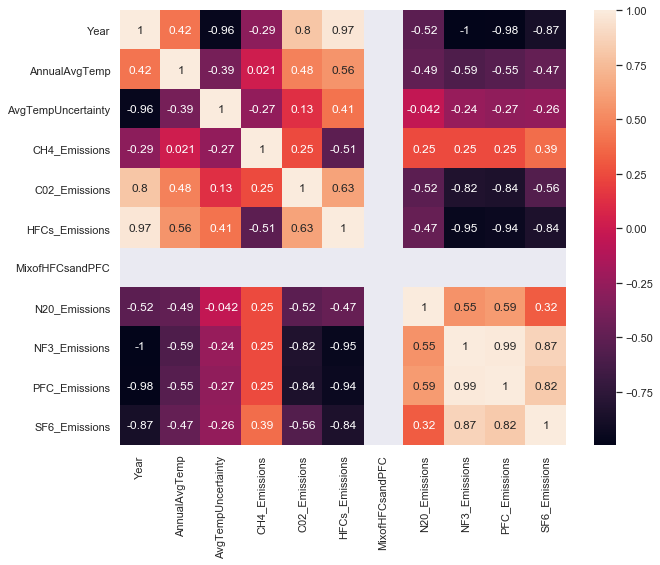

In [66]:
# correlation for Canada 
plt.figure(figsize = (10,8))
corr_Canada = df_Canada.corr()
sns.heatmap(corr_Canada, annot = True)

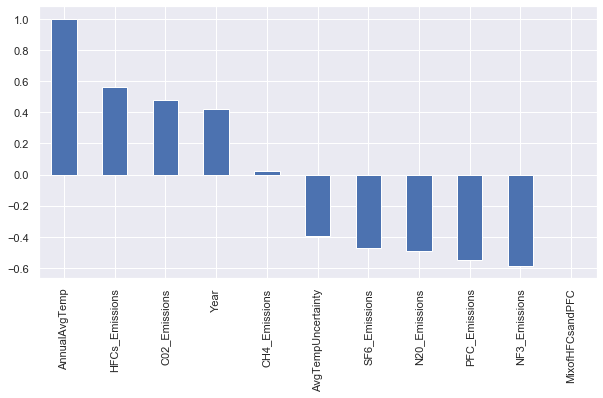

In [67]:
# correlation for Canada
plt.figure(figsize = (10,5))
corr_Canada['AnnualAvgTemp'].sort_values(ascending = False).plot(kind = 'bar');

In [69]:
from plotly.subplots import make_subplots
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_Canada["Year"], y=df_Canada["C02_Emissions"], 
                         mode="lines+markers", name="C02 Emissions"),secondary_y=False,)

fig.add_trace(go.Scatter(x=df_Canada["Year"], y=df_Canada["CH4_Emissions"], 
                         mode="lines+markers", name="CH4 Emissions"),secondary_y=False,)

fig.add_trace(go.Scatter(x=df_Canada["Year"], y=df_Canada["HFCs_Emissions"], 
                         mode="lines+markers", name="HFCs Emissions"),secondary_y=False,)

fig.add_trace(go.Scatter(x=df_Canada["Year"], y=df_Canada["N20_Emissions"], 
                         mode="lines+markers", name="N20 Emissions"),secondary_y=False,)

fig.add_trace(go.Scatter(x=df_Canada["Year"], y=df_Canada["NF3_Emissions"], 
                         mode="lines+markers", name="NF3_Emissions"),secondary_y=False,)

fig.add_trace(go.Scatter(x=df_Canada["Year"], y=df_Canada["PFC_Emissions"], 
                         mode="lines+markers", name="PFC_Emissions"),secondary_y=False,)

fig.add_trace(go.Scatter(x=df_Canada["Year"], y=df_Canada["SF6_Emissions"], 
                         mode="lines+markers", name="SF6_Emissions"),secondary_y=False,)


fig.add_trace(go.Scatter(x=df_Canada["Year"], 
                         y=df_Canada["AnnualAvgTemp"], mode="lines+markers", name="Annual AvgTemp"),secondary_y=True,)

fig.update_layout( title_text="Emissions & Annual Average Temperature")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Emissions", secondary_y= False)
fig.update_yaxes(title_text="Annual Average Temperature", secondary_y= True)
fig.show()